In [1]:
import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame
data_train = pd.read_csv("train.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Figure size 640x480 with 0 Axes>

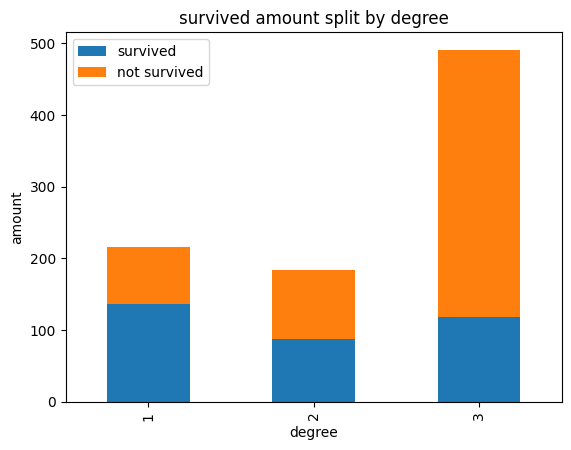

In [5]:
#舱级
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.5)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'not survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survived amount split by degree")
plt.xlabel(u"degree") 
plt.ylabel(u"amount") 

plt.show()

<Figure size 640x480 with 0 Axes>

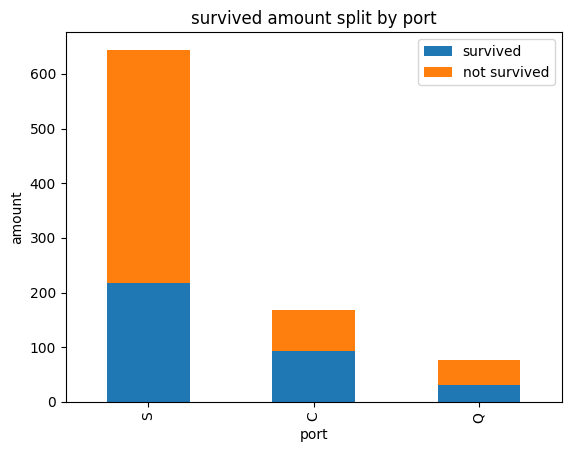

In [6]:
#港口
fig = plt.figure()
fig.set(alpha=0.5)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'not survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survived amount split by port")
plt.xlabel(u"port") 
plt.ylabel(u"amount") 

plt.show()

<Figure size 640x480 with 0 Axes>

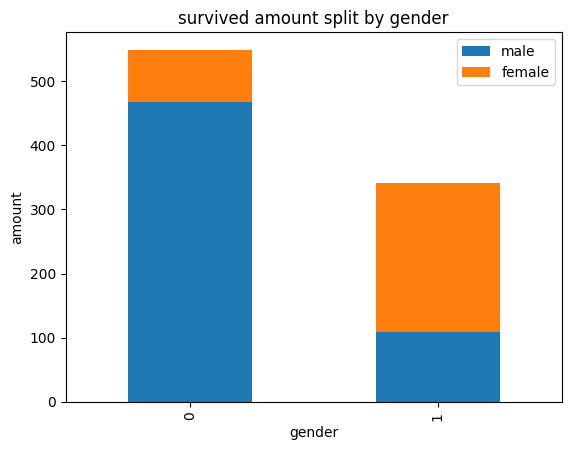

In [7]:
#性别
fig = plt.figure()
fig.set(alpha=0.5)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':Survived_m, u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"survived amount split by gender")
plt.xlabel(u"gender") 
plt.ylabel(u"amount")
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1:])
    df.loc[df.Age.isnull(), 'Age'] = predictedAges
    return df,rfr

def set_Cabin_type(df):
    df.loc[df.Cabin.notnull(), 'Cabin'] = "Yes"
    df.loc[df.Cabin.isnull(), 'Cabin'] = "No"
    return df

data_train,rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [9]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin',dtype='int')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked',dtype='int')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex',dtype='int')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass',dtype='int')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [10]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561377,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613173,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267740,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392945,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392945,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426381,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787723,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029565,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194330,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148652,-0.042956


In [11]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values
y = train_np[:, 0]
X = train_np[:, 1:]
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

In [12]:
#测试集特征变换
data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin',dtype='int')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked',dtype='int')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex',dtype='int')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass',dtype='int')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test.head(10)

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307526,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256242,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394702,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261704,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641190,-0.416740
5,897,14.0,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248369,-0.471623
6,898,30.0,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034012,-0.500221
7,899,26.0,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337601,-0.117238
8,900,18.0,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944780,-0.507390
9,901,21.0,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717088,-0.204154


In [13]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

/Users/tiachi/ml/env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [14]:
pd.read_csv("logistic_regression_predictions.csv").head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [15]:
from sklearn.model_selection import cross_val_score, train_test_split

clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:,1:]
y = all_data.values[:,0]
print(cross_val_score(clf, X, y, cv=5))

[0.81564246 0.80898876 0.78651685 0.78651685 0.81460674]


In [16]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
# split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# 对cross validation数据进行预测

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
139,140,0,1,"Giglio, Mr. Victor",male,24.00,0,0,PC 17593,79.2000,B86,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S


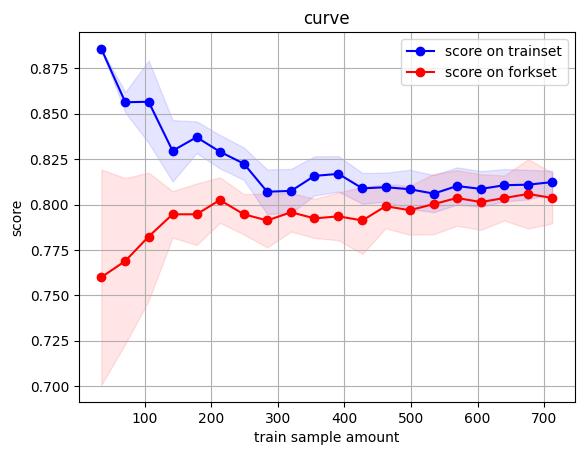

(0.8041289762608517, 0.028972978630723678)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train sample amount")
        plt.ylabel(u"score")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"score on trainset")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"score on forkset")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"curve", X, y)

In [18]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model. LogisticRegression(C = 1.0, penalty = 'l1',solver='liblinear')
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)

/Users/tiachi/ml/env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


In [19]:
result.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
